In [1]:
import matplotlib.pyplot as plt
import numpy as np


from astropy.io import fits 
import pandas as pd
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
from gammapy.data import DataStore

In [3]:
from gammapy.catalog import CATALOG_REGISTRY
CATALOG_REGISTRY

[gammapy.catalog.gammacat.SourceCatalogGammaCat,
 gammapy.catalog.hess.SourceCatalogHGPS,
 gammapy.catalog.hawc.SourceCatalog2HWC,
 gammapy.catalog.fermi.SourceCatalog3FGL,
 gammapy.catalog.fermi.SourceCatalog4FGL,
 gammapy.catalog.fermi.SourceCatalog2FHL,
 gammapy.catalog.fermi.SourceCatalog3FHL,
 gammapy.catalog.hawc.SourceCatalog3HWC]

### Use [Gamma-Cat](https://gamma-cat.readthedocs.io/data/catalog.html) Catalog

In [4]:
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()

catalog_gammacat.table[0:5]

source_id,common_name,gamma_names,fermi_names,other_names,where,classes,discoverer,seen_by,discovery_date,tevcat_id,tevcat2_id,tevcat_name,tgevcat_id,tgevcat_name,reference_id,significance,livetime,ra,dec,glon,glat,pos_ra,pos_dec,pos_glon,pos_glat,pos_err,morph_type,morph_sigma,morph_sigma_err,morph_sigma2,morph_sigma2_err,morph_pa,morph_pa_err,morph_pa_frame,spec_type,spec_pl_norm,spec_pl_norm_err,spec_pl_norm_err_sys,spec_pl_index,spec_pl_index_err,spec_pl_index_err_sys,spec_pl_e_ref,spec_pl2_flux,spec_pl2_flux_err,spec_pl2_flux_err_sys,spec_pl2_index,spec_pl2_index_err,spec_pl2_index_err_sys,spec_pl2_e_min,spec_pl2_e_max,spec_ecpl_norm,spec_ecpl_norm_err,spec_ecpl_norm_err_sys,spec_ecpl_index,spec_ecpl_index_err,spec_ecpl_index_err_sys,spec_ecpl_e_cut,spec_ecpl_e_cut_err,spec_ecpl_e_cut_err_sys,spec_ecpl_e_ref,spec_erange_min,spec_erange_max,spec_theta,spec_dnde_1TeV,spec_dnde_1TeV_err,spec_flux_1TeV,spec_flux_1TeV_err,spec_flux_1TeV_crab,spec_flux_1TeV_crab_err,spec_eflux_1TeV_10TeV,spec_eflux_1TeV_10TeV_err,sed_reference_id,sed_n_points,sed_n_ul,sed_e_ref,sed_e_min,sed_e_max,sed_dnde,sed_dnde_err,sed_dnde_errp,sed_dnde_errn,sed_dnde_ul
,,,,,,,,,,,,,,,,,h,deg,deg,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,deg,deg,deg,,,1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),,,,TeV,1 / (s cm2),1 / (s cm2),1 / (s cm2),,,,TeV,TeV,1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),,,,TeV,TeV,TeV,TeV,TeV,TeV,deg,1 / (TeV s cm2),1 / (TeV s cm2),1 / (s cm2),1 / (s cm2),,,erg / (s cm2),erg / (s cm2),,,,TeV,TeV,TeV,1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2)
int32,bytes21,bytes76,bytes72,bytes73,bytes4,bytes11,bytes8,bytes35,bytes7,int64,bytes6,bytes14,int64,bytes14,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float32,float32,float32,float32,float32,float32,bytes8,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes19,int32,int32,float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40]
1,CTA 1,VER J0006+729,--,SNR G119.5+10.2,gal,"pwn,snr",veritas,veritas,2011-10,227,rC5JCj,TeV J0006+729,1,TeV J0006+7259,2013ApJ...764...38A,7.5,41.25,1.65,72.783,119.58025,10.203682,1.6083333,72.98361,119.603905,10.4033165,0.06,gauss,0.3,0.03,0.24,0.03,17.4,15.8,radec,pl,9.1e-14,1.3e-14,1.7e-14,2.2,0.2,0.3,3.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1.0202537e-12,2.6738846e-13,8.502113e-13,1.2956478e-13,4.098503,0.6245761,3.0162344e-12,4.314187e-13,2013ApJ...764...38A,6,0,-- .. --,0.56 .. --,1.0 .. --,1.9e-12 .. --,9e-13 .. --,-- .. --,-- .. --,-- .. --
2,SHBL J001355.9-185406,--,--,--,egal,hbl,hess,hess,2010-11,213,70hRXZ,TeV J0013-188,2,TeV J0013-1853,--,--,--,3.4835584,-18.901848,74.63201,-78.08694,--,--,--,--,--,none,--,--,--,--,--,--,--,none,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0,0,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --
3,Tycho SNR,--,--,"SNR G120.1+1.4,3C10,SN1572",gal,snr,veritas,veritas,2010-05,209,xCyAjF,TeV J0025+641,3,TeV J0025+6410,2017arXiv170106740V,6.9,147.0,6.3397,64.1408,120.09236,1.4129305,6.34,64.13,120.0914,1.4021726,0.024494898,point,--,--,--,--,--,--,--,pl,2.2e-13,5e-14,6e-14,2.92,0.42,0.2,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,2.2e-13,5e-14,1.1458334e-13,3.6144542e-14,0.55235696,0.1742373,3.370669e-13,1.3349918e-13,--,0,0,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --
4,KUV 00311-1938,--,--,--,egal,hbl,hess,hess,2012-07,239,PKJZqs,TeV J0033-193,4,TeV J0033-1921,--,--,--,8.393288,-19.359205,94.174644,-81.2161,--,--,--,--,--,none,--,--,--,--,--,--,--,none,--,--,--,--,--,--,--,--,--,--,--,

#### Spectral Model is Not Available for ALL Sources

In [5]:
example_Gamma_CAT_source = catalog_gammacat["1ES 0033+595"]
example_Gamma_CAT_source.name, type(example_Gamma_CAT_source.spectral_model())

('1ES 0033+595', NoneType)

In [6]:
print ('number of TeV Sources: ', len(catalog_gammacat.table))

number of TeV Sources:  162


#### let's calculate the integrated flux for sources with defined spectral model

In [9]:
example_Gamma_CAT_source_1 = catalog_gammacat["CTA 1"]
example_Gamma_CAT_source_1.name, type(example_Gamma_CAT_source_1.spectral_model())

('CTA 1', gammapy.modeling.models.spectral.PowerLawSpectralModel)

In [10]:
# 70 GeV to 10 TeV
flux_Source1 = (example_Gamma_CAT_source_1.spectral_model().integral(70 * u.GeV, 10000 * u.GeV).to("cm-2 s-1"))
print (flux_Source1)

2.0619632560398227e-11 1 / (s cm2)


#### What about the source locations

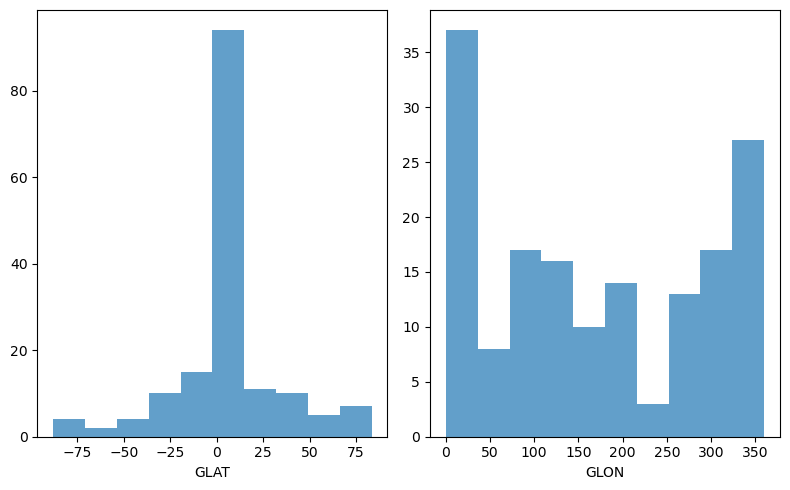

In [19]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.hist(catalog_gammacat.table['glat'], alpha=0.7)
plt.xlabel('GLAT')
fig.add_subplot(122)
plt.hist(catalog_gammacat.table['glon'], alpha=0.7)
plt.xlabel('GLON')
plt.tight_layout()
plt.show()

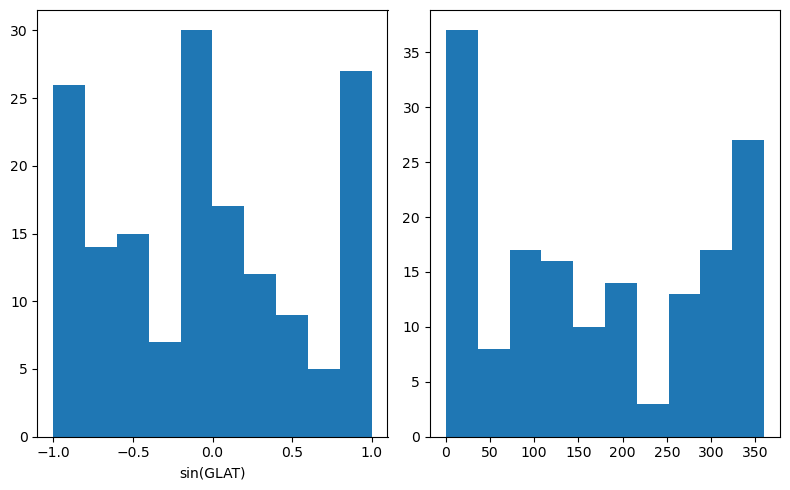

In [21]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.hist(np.sin(catalog_gammacat.table['glat']))
plt.xlabel('sin(GLAT)')
fig.add_subplot(122)
plt.hist(catalog_gammacat.table['glon'])
plt.tight_layout()
plt.show()

### Compare the PSR locations from 4FGL

In [11]:
### what about 4FGL catalog 

read_4FGLDR2_cat = fits.open('/home/sbhattacharyya/Music/gll_psc_v27.fit')
read_4FGLDR2_cat[1].data.columns

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'DataRelease'; format = 'I'; null = 16959
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; di

In [13]:
#### turn this into a dataframe

read_4FGLcat_data_tab = Table.read(read_4FGLDR2_cat, format='fits')

names_4FGL = [name for name in read_4FGLcat_data_tab.colnames if len(read_4FGLcat_data_tab[name].shape)<=1]
df_4FGL = read_4FGLcat_data_tab[names_4FGL].to_pandas()
df_4FGL.head(4)

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,...,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,4FGL J0000.3-7355,1,0.0983,-73.921997,307.708984,-42.729538,0.032378,0.031453,-62.700001,0.0525,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
1,4FGL J0000.5+0743,2,0.1375,7.727300,101.656479,-53.029457,0.094544,0.069999,-10.220000,0.1533,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
2,4FGL J0001.2+4741,1,0.3126,47.685902,114.250198,-14.338059,0.036880,0.033180,-45.900002,0.0598,...,bcu,,B3 2358+474,,0.996097,0.938563,0.329341,47.700201,8.400000e-07,0
3,4FGL J0001.2-0747,1,0.3151,-7.797100,89.032722,-67.305008,0.018440,0.017577,64.099998,0.0299,...,bll,,PMN J0001-0746,,0.997014,0.932932,0.325104,-7.774145,1.800000e-07,0


In [15]:
#### select the pulsars they are distributed more close to the planes

df_4FGL_psrs = df_4FGL[(df_4FGL['CLASS1']=='psr  ') | (df_4FGL['CLASS1']=='PSR  ')]
print ('how many psrs in DR2: ', df_4FGL_psrs.shape) 

how many psrs in DR2:  (271, 67)


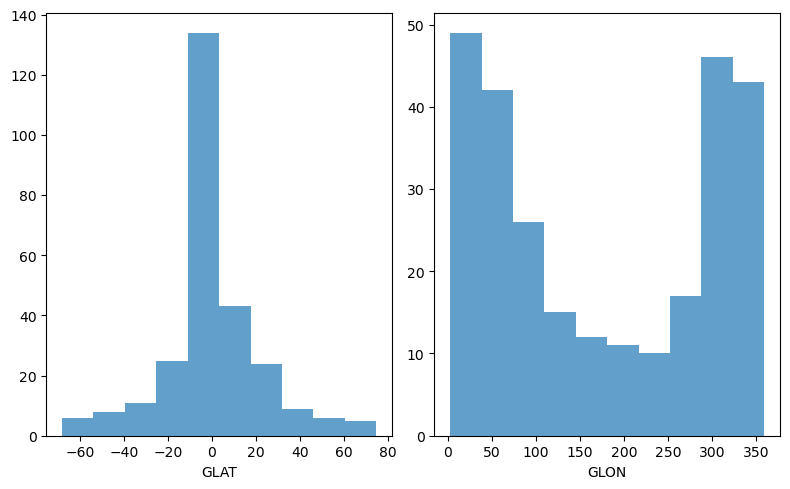

In [22]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.hist(df_4FGL_psrs['GLAT'], alpha=0.7)
plt.xlabel('GLAT')
fig.add_subplot(122)
plt.hist(df_4FGL_psrs['GLON'], alpha=0.7)
plt.xlabel('GLON')
plt.tight_layout()
plt.show()

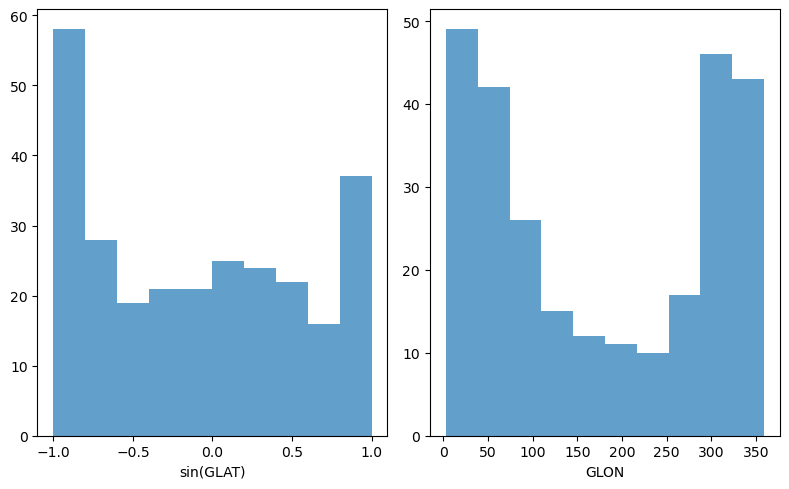

In [23]:
fig = plt.figure(figsize=(8, 5))
fig.add_subplot(121)
plt.hist(np.sin(df_4FGL_psrs['GLAT']), alpha=0.7)
plt.xlabel('sin(GLAT)')
fig.add_subplot(122)
plt.hist(df_4FGL_psrs['GLON'], alpha=0.7)
plt.xlabel('GLON')
plt.tight_layout()
plt.show()